In [1]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [2]:
import os
current_directory = os.getcwd()
print(current_directory) 

C:\Users\sciber\Downloads\2024 Spring URP\kpopradar_dlab_2024S


In [5]:
df=pd.read_csv('../original_data/KAIST_kpopradar_youtube_channel_20230930.csv')

In [6]:
df.head()

,artist_id,artist_name,account_name,url,date,subscriber_count
0,5,TWICE (트와이스),TWICE,https://www.youtube.com/channel/UCzgxx_DM2Dcb9...,20180928,2915585
1,31,비투비,BTOB 비투비 (Official YouTube Channel),https://www.youtube.com/channel/UCgB7A457ULlgm...,20180928,1196850
2,272,EXO,EXO,https://www.youtube.com/channel/UCzCedBCSSltI1...,20180928,1750403
3,273,방탄소년단,BANGTANTV,https://www.youtube.com/channel/UCLkAepWjdylmX...,20180928,11746717
4,278,인피니트,NaN,https://www.youtube.com/channel/UCdzXSux7OnRD1...,20180928,380668


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708694 entries, 0 to 708693
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   artist_id         708694 non-null  int64 
 1   artist_name       708694 non-null  object
 2   account_name      227259 non-null  object
 3   url               708694 non-null  object
 4   date              708694 non-null  int64 
 5   subscriber_count  708694 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 32.4+ MB


In [8]:
#checking for duplicate values
df.duplicated().value_counts()

False    708694
Name: count, dtype: int64

In [9]:
df.shape

(708694, 6)

In [11]:
# Description of the Data
df.describe().astype(int)

,artist_id,date,subscriber_count
count,708694,708694,708694
mean,900,20212087,937334
std,643,12863,4219261
min,4,20180928,0
25%,324,20200814,15300
50%,767,20210916,125000
75%,1489,20220917,587000
max,2730,20230930,91500000


In [51]:
# Get specified data for BLACKPINK artist_name, type conversion of 'date' column to datetime

BLACKPINK_df = df[df['artist_name'] == 'BLACKPINK'].sort_values('date')
BLACKPINK_df['date'] = pd.to_datetime(BLACKPINK_df['date'], format='%Y%m%d')

In [60]:
BLACKPINK_df

,artist_id,artist_name,account_name,url,date,subscriber_count
24,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-09-28,12125238
84,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-09-29,12160193
147,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-09-30,12193787
210,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-10-01,12219565
273,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2018-10-02,12244366
...,...,...,...,...,...,...
706049,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-26,91400000
706600,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-27,91400000
707151,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-28,91500000
707702,326,BLACKPINK,BLACKPINK,https://www.youtube.com/channel/UCOmHUn--16B90...,2023-09-29,91500000


In [69]:
from matplotlib.ticker import ScalarFormatter, MaxNLocator

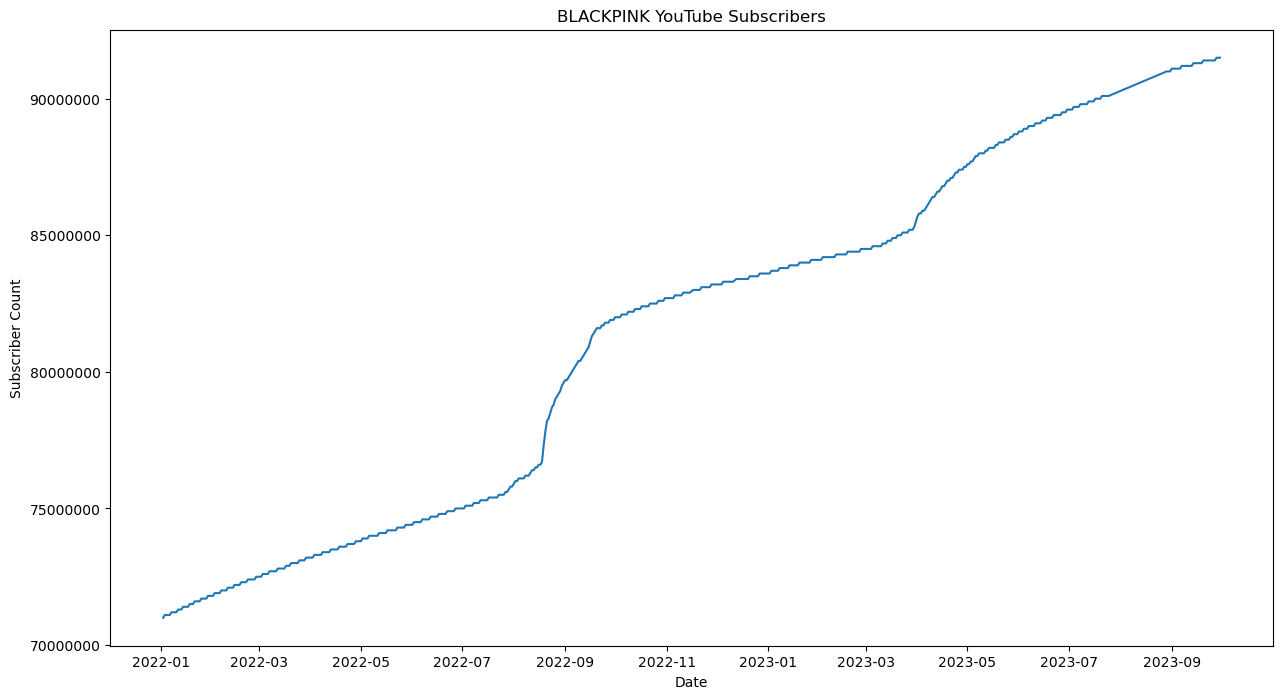

In [72]:
# Replace 'specified_date' with the date you want to compare against (in datetime format)
specified_date = pd.to_datetime('2022-01-01')

# Filter the DataFrame to get rows with date greater than specified_date
filtered_BLACKPINK_df = BLACKPINK_df[BLACKPINK_df['date'] > specified_date]

plt.figure(figsize = (15,8))
plt.plot(filtered_BLACKPINK_df['date'], filtered_BLACKPINK_df['subscriber_count'])

# Apply ScalarFormatter to the y-axis (subscriber_count)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')  # Another way to disable scientific notation

plt.title('BLACKPINK YouTube Subscribers')
plt.xlabel('Date')
plt.ylabel('Subscriber Count')

plt.show()

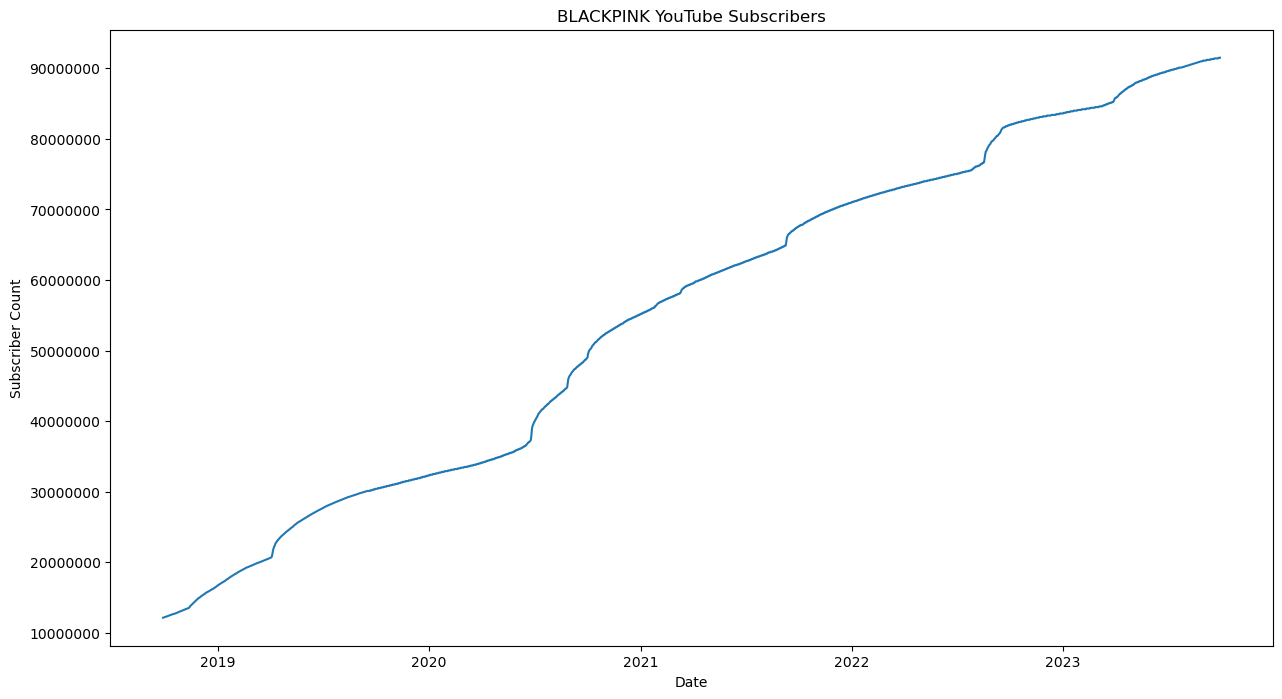

In [73]:
# Replace 'specified_date' with the date you want to compare against (in datetime format)
specified_date = pd.to_datetime('2018-01-01')

# Filter the DataFrame to get rows with date greater than specified_date
filtered_BLACKPINK_df = BLACKPINK_df[BLACKPINK_df['date'] > specified_date]

plt.figure(figsize = (15,8))
plt.plot(filtered_BLACKPINK_df['date'], filtered_BLACKPINK_df['subscriber_count'])

# Apply ScalarFormatter to the y-axis (subscriber_count)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')  # Another way to disable scientific notation

plt.title('BLACKPINK YouTube Subscribers')
plt.xlabel('Date')
plt.ylabel('Subscriber Count')

plt.show()

In [1]:
#Goal: How to get monthly-splitted plot?

In [ ]:
# Replace 'specified_date' with the date you want to compare against (in datetime format)
start_date = pd.to_datetime('2019-09-01') ### Change Here!
end_date = pd.to_datetime('2021-04-01')
quantity_name = 'subscriber_count' ### Type the column name of desired quantity!

# Filter the DataFrame to get rows with date greater than specified_date
filtered_BLACKPINK_df = BLACKPINK_df[(BLACKPINK_df['date'] > start_date) & (BLACKPINK_df['date'] < end_date)]

plt.figure(figsize = (15,8))
plt.plot(filtered_BLACKPINK_df['date'], filtered_BLACKPINK_df[quantity_name])

# Apply ScalarFormatter to the y-axis (subscriber_count)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')  # Another way to disable scientific notation

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Show grid
plt.grid(True)

plt.title('BLACKPINK Twitter' + ' ' + quantity_name)
plt.xlabel('Date')
plt.ylabel(quantity_name)

plt.show()